In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
queue:  mlt1 rho:  0.1
queue:  mlt1 rho:  0.2
queue:  mlt1 rho:  0.3
queue:  mlt1 rho:  0.4
queue:  mlt1 rho:  0.5
queue:  mlt1 rho:  0.6
queue:  mlt1 rho:  0.7
queue:  mlt1 rho:  0.8
queue:  mlt1 rho:  0.9
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
queue:  mlt2 rho:  0.1
queue:  mlt2 rho:  0.2
queue:  mlt2 rho:  0.3
queue:  mlt2 rho:  0.4
queue:  mlt2 rho:  0.5
queue:  mlt2 rho:  0.6
queue:  mlt2 rho:  0.7
queue:  mlt2 rho:  0.8
queue:  mlt2 rho:  0.9
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
queue:  mlt4 rho:  0.1
queue:  mlt4 rho:  0.2
queue:  mlt4 rho:  0.3
queue:  mlt4 rho:  0.4
queue:  mlt4 rho:  0.5
queue:  mlt4 rho:  0.6
queue:  mlt4 rho:  0.7
queue:  mlt4 rho:  0.8
queue:  mlt4 rho:  0.9


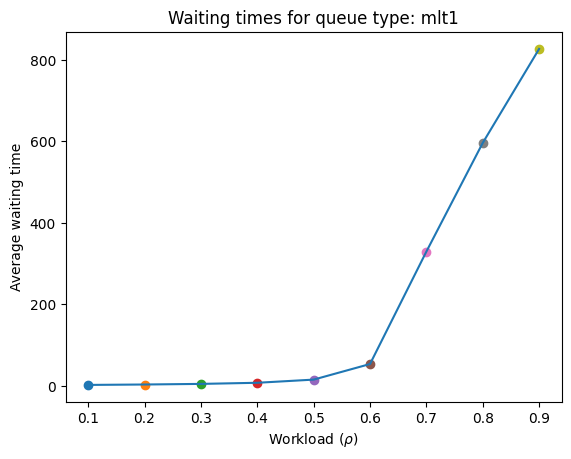

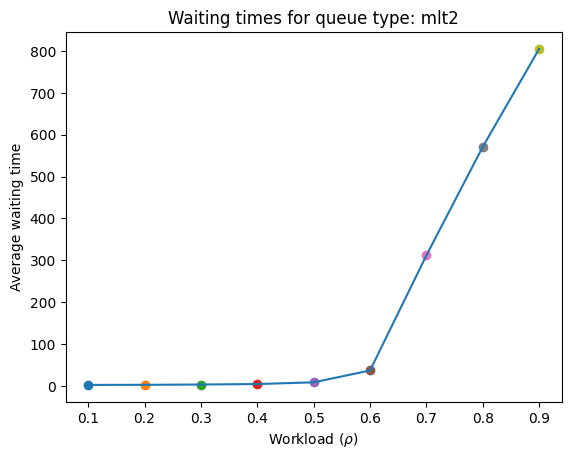

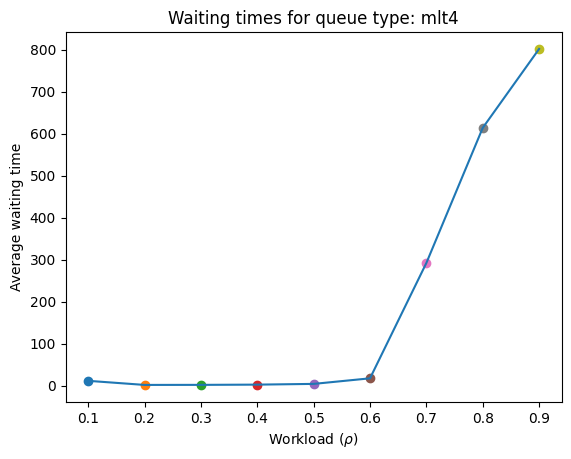

In [15]:
types = ["mlt1", "mlt2", "mlt4"]
rhos = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mean_values = {}
std_values = {}

for type in types:
    df = pd.read_csv("data/" + type + "_means.csv")
    df.columns = ["rho", "arrive", "waits", "tot_length"]

    plt.figure()
    means_per_rho = []
    std_values_per_rho = []

    for rho in rhos:
        print("queue: ", type, "rho: ", rho)

        mean = df[df["rho"] == rho]["waits"].mean()
        std = df[df["rho"] == rho]["waits"].std()

        plt.scatter(rho, mean)
        plt.title("Waiting times for queue type: " + type)
        plt.ylabel("Average waiting time")
        plt.xlabel("Workload ($\\rho$)")

        means_per_rho.append(mean)
        std_values_per_rho.append(std)

    plt.plot(rhos, means_per_rho)
    mean_values[type] = means_per_rho
    std_values[type] = std_values_per_rho

    plt.savefig("plots/MLt/" + type + "_plot.png", dpi=300)

9
9


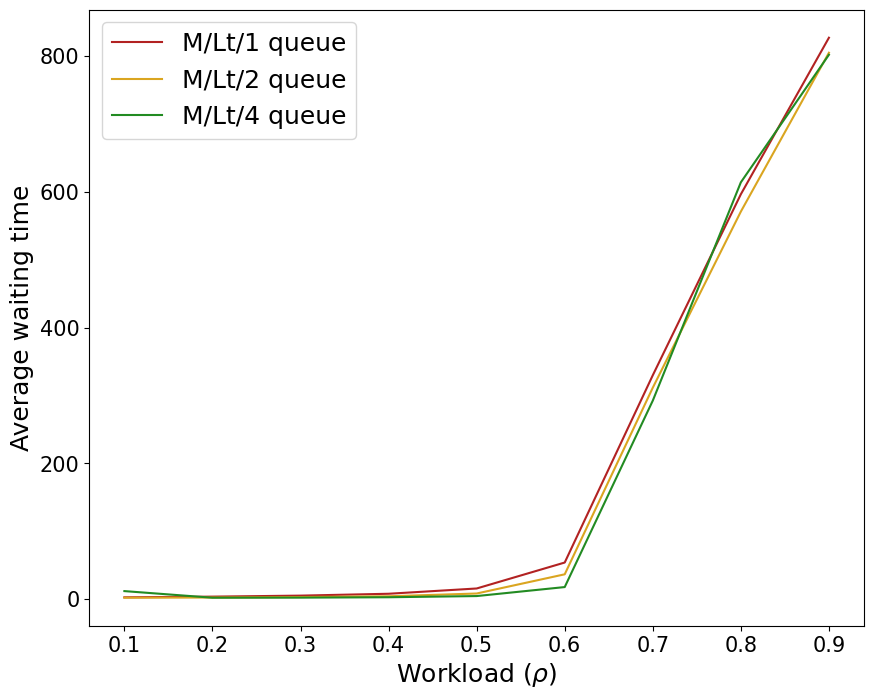

In [17]:
# plot against varying rhos
plt.figure(figsize=(10,8))
plt.plot(rhos, mean_values["mlt1"], label="M/Lt/1 queue", color="firebrick")
plt.plot(rhos, mean_values["mlt2"], label="M/Lt/2 queue", color="goldenrod")
plt.plot(rhos, mean_values["mlt4"], label="M/Lt/4 queue", color="forestgreen")

z = 1.96
N = np.sqrt(len(mean_values["mlt1"]))

# plt.fill_between(rhos,
#                         [mean_values["mlt1"][i] - z * std_values["mlt1"][i] / N for i in range(len(mean_values["mlt1"]))],
#                         [mean_values["mlt1"][i] + z * std_values["mlt1"][i] / N for i in range(len(mean_values["mlt1"]))],
#                         facecolor="firebrick",
#                         alpha=0.5)
# plt.fill_between(rhos,
#                         [mean_values["mlt2"][i] - z * std_values["mlt2"][i] / N for i in range(len(mean_values["mlt2"]))],
#                         [mean_values["mlt2"][i] + z * std_values["mlt2"][i] / N for i in range(len(mean_values["mlt2"]))],
#                         facecolor="goldenrod",
#                         alpha=0.5)
# plt.fill_between(rhos,
#                         [mean_values["mlt4"][i] - z * std_values["mlt4"][i] / N for i in range(len(mean_values["mlt4"]))],
#                         [mean_values["mlt4"][i] + z * std_values["mlt4"][i] / N for i in range(len(mean_values["mlt4"]))],
#                         facecolor="forestgreen",
#                         alpha=0.5)

plt.legend(prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel("Average waiting time", size=15)
plt.xlabel("Workload ($\\rho$)", size=15)
plt.savefig("plots/MLt/MLt_all.png", dpi=300)